In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
import pickle

df = pd.read_csv('datasets/train.csv')

In [2]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis=1, inplace=True)

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype('int64')

In [5]:
le = LabelEncoder()

In [6]:
sex = le.fit_transform(df['Sex'])
df['Sex'] = sex

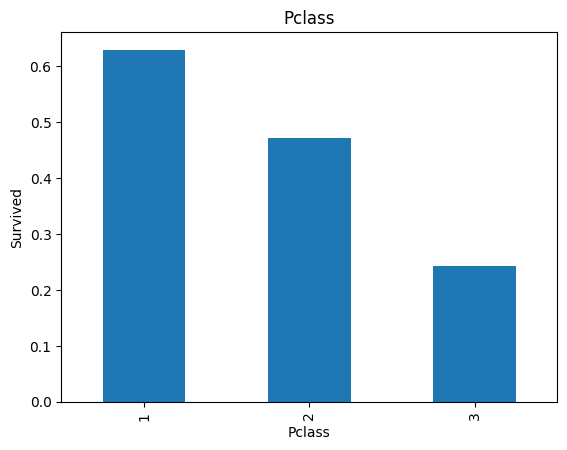

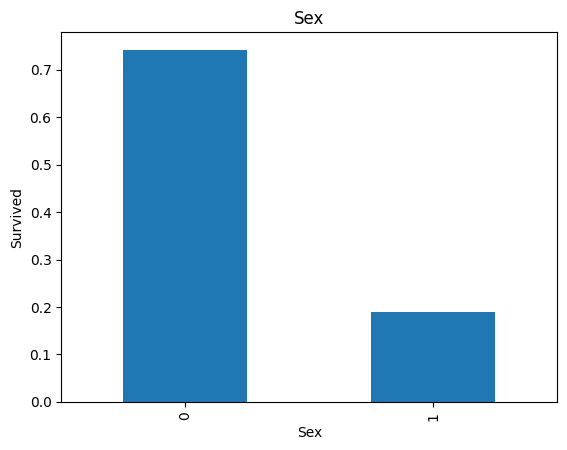

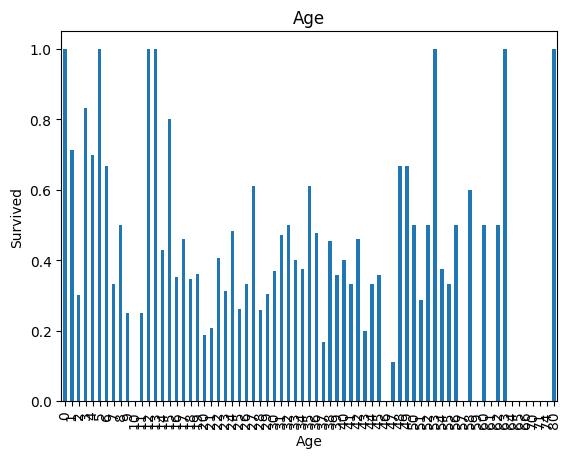

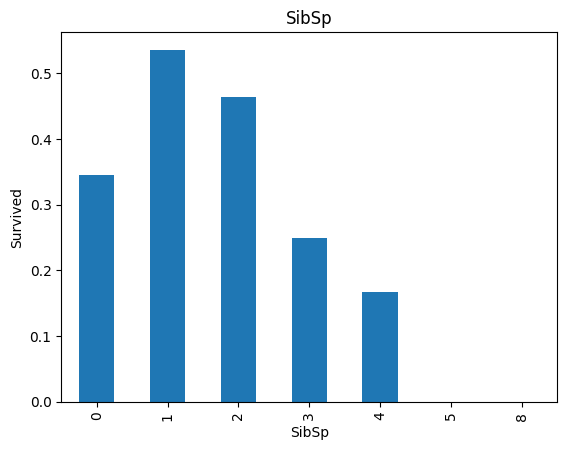

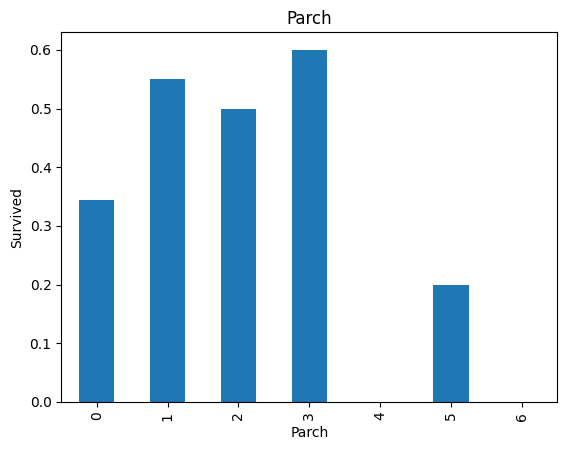

In [7]:
for col in df.columns.drop('Survived'):
    new_col = df.groupby(col)['Survived'].mean()
    plt.figure()
    new_col.plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Survived')
    plt.show()

In [8]:
SEED = 42

In [9]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [11]:
kf = KFold(n_splits=70, shuffle=True, random_state=SEED)
rf = RandomForestClassifier()
gs = RandomizedSearchCV(rf, param_distributions={'max_depth': range(2, 10),
                                                 "n_estimators":range(10, 200, 10), "random_state":range(1, 50)}, cv=kf, scoring='accuracy', refit=True)

In [12]:
gs.fit(X_train, y_train)
gs.best_params_


{'random_state': 32, 'n_estimators': 170, 'max_depth': 3}

In [13]:
gs.score(X_test, y_test)

0.8044692737430168

_mejores valores_:{'random_state': 40, 'n_estimators': 70, 'max_depth': 4}

In [14]:
pickle.dump(gs, open('models/titanic_model.pkl', 'wb'))